# How To approach a ML Problem

## Step 1 - Understand Business Requirements & Nature of Data

<img src="https://i.imgur.com/63XEArk.png" width="640">


Most machine learning models are trained to serve a real-world use case. It's important to understand the business requirements, modeling objectives and the nature of the data available before you start building a machine learning model.



Here are the topics in machine learning that we're studying in this course ([source](https://vas3k.com/blog/machine_learning/)): 

<img src="https://i.imgur.com/VbVFAsg.png" width="640">



### Loss Functions and Evaluation Metrics

Once you have identified the type of problem you're solving, you need to pick an appropriate evaluation metric. Also, depending on the kind of model you train, your model will also use a loss/cost function to optimize during the training process.

* **Evaluation metrics** - they're used by humans to evaluate the ML model

* **Loss functions** - they're used by computers to optimize the ML model

They are often the same (e.g. RMSE for regression problems), but they can be different (e.g. Cross entropy and Accuracy for classification problems).

See this article for a survey of common loss functions and evaluation metrics: https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7

## Data Cleaning


In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

ross_df = pd.read_csv('../data/RossmanStores/train.csv', low_memory=False)

ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
store_df = pd.read_csv('../data/RossmanStores/store.csv', low_memory=False)

store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
merged_df = ross_df.merge(store_df, how='left', on='Store')

merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
merged_df.shape

(1017209, 18)

In [8]:
test_df = pd.read_csv('../data/RossmanStores/test.csv')

test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [9]:
merged_test_df = test_df.merge(store_df, how='left', on='Store')
merged_test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


## Data Cleaning

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [11]:
round(merged_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [12]:
merged_df.duplicated().sum()

np.int64(0)

In [13]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [14]:
merged_df['Date'].min(), merged_df['Date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [15]:
merged_test_df['Date'].min(), merged_test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

### Exploratory Data Analysis and Visualization

Objectives of exploratory data analysis:

- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies or errors in the data (e.g. missing/incorrect values)
- Study the relationship of target column with other columns (linear, non-linear etc.)
- Gather insights about the problem and the dataset
- Come up with ideas for preprocessing and feature engineering



<Axes: xlabel='Sales', ylabel='Count'>

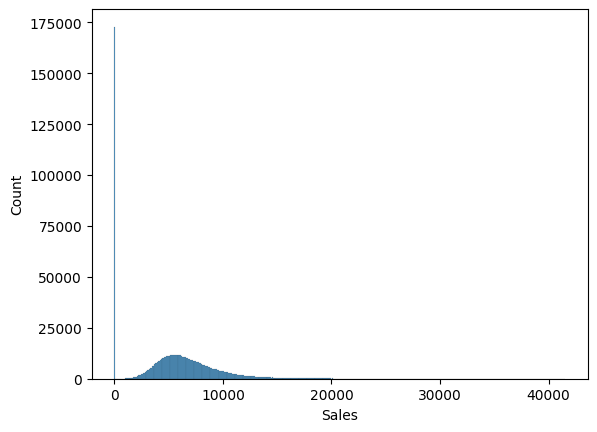

In [16]:
sns.histplot(data=merged_df, x='Sales')

In [17]:
merged_df.Open.value_counts()[0]

np.int64(172817)

In [18]:
merged_df = merged_df[merged_df['Open'] == 1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

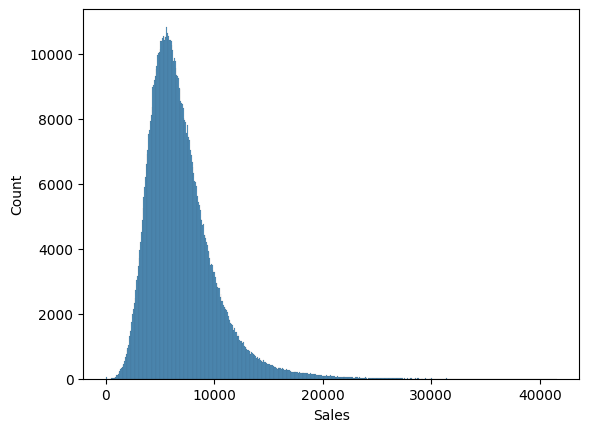

In [19]:
sns.histplot(merged_df, x='Sales')

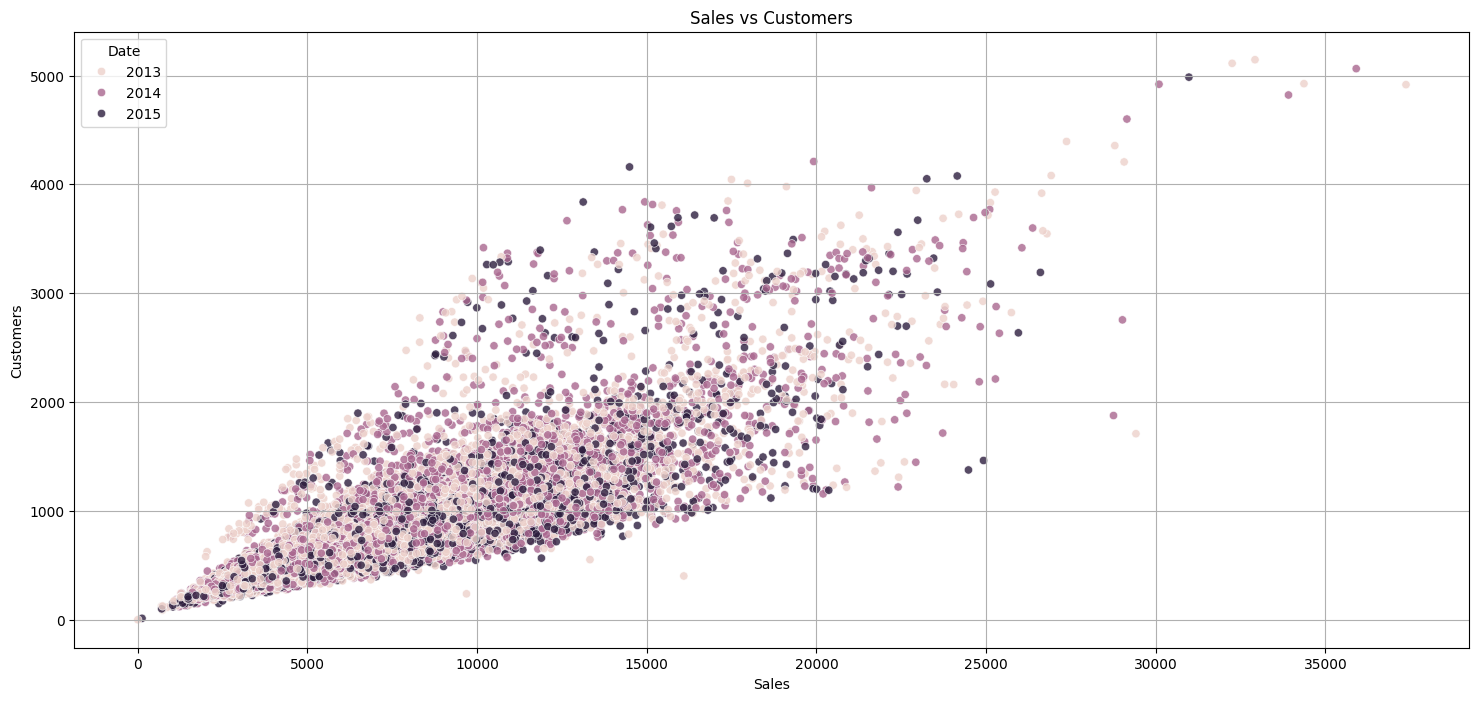

In [20]:
plt.figure(figsize=(18, 8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title('Sales vs Customers')
plt.grid()
plt.show()

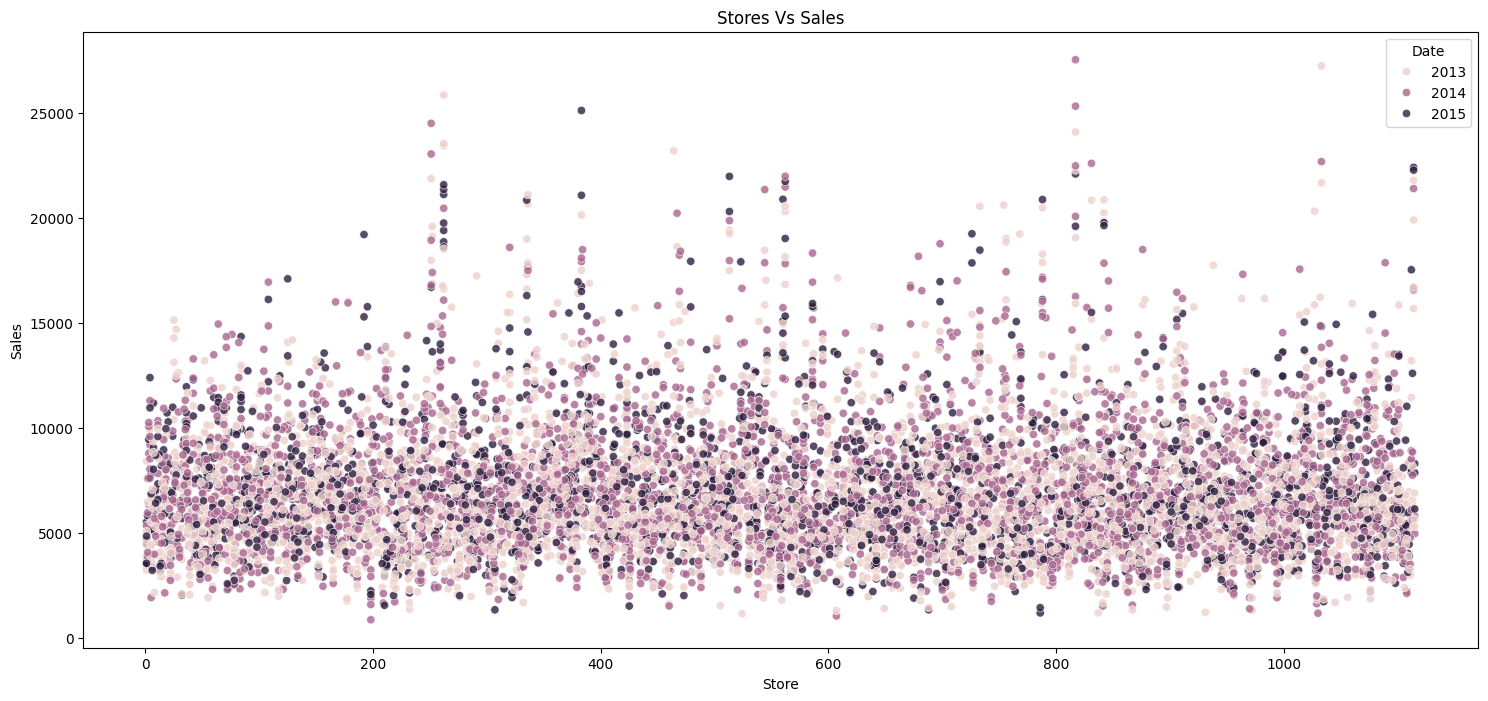

In [21]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

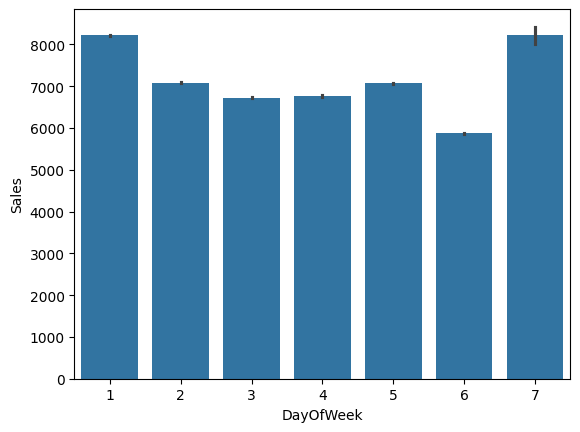

In [22]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

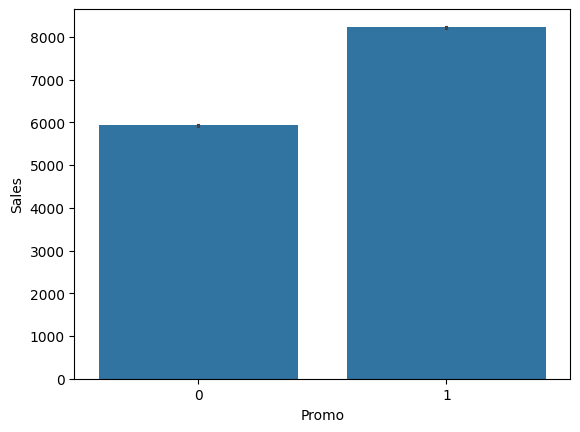

In [23]:
sns.barplot(data=merged_df, x='Promo', y='Sales')


In [24]:
import numpy as np

merged_df.select_dtypes(include=np.number).corr()['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

## Feature Engineering

In [25]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

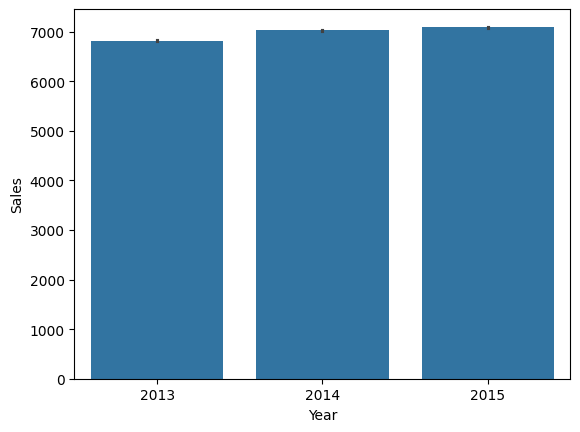

In [26]:
sns.barplot(data=merged_df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

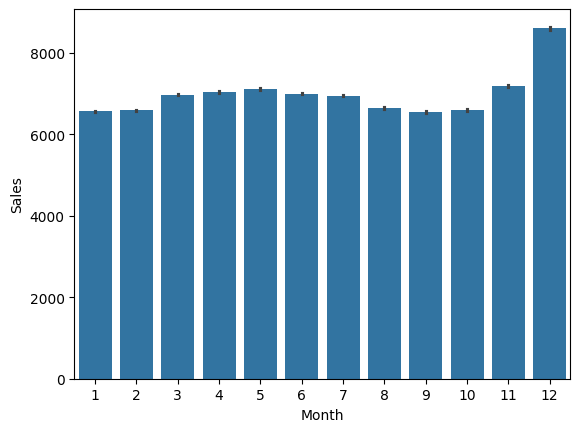

In [27]:
sns.barplot(data=merged_df, x='Month', y='Sales')


## Training the model

In [28]:
len(merged_df)

844392

In [29]:
train_size = int(.75 * len(merged_df))
train_size

633294

In [30]:
sorted_df = merged_df.sort_values('Date', ascending=True)
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

len(train_df), len(val_df)

(633294, 211098)

In [31]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013


In [32]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [33]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [34]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [35]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [36]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']

target_cols = 'Sales'

In [37]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [38]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [39]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [40]:
test_inputs = merged_test_df[input_cols].copy()

In [41]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

In [42]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train_inputs[numeric_cols])
 
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [44]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [45]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

## Fixed Random guess


In [46]:
train_targets.mean()

np.float64(6873.17964168301)

In [47]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

train_preds = return_mean(X_train)
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076], shape=(633294,))

In [48]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(train_preds, train_targets)

2287.1539974375946

In [49]:
mean_absolute_error(return_mean(X_val), val_targets)

2305.197155397541

## Hand-coded Strategies


> **EXERCISE**: Write a function that implements the following strategy:
>
> 1. If the store is closed, return 0.
> 2. If the store is open, return the average sales of the store for the current month in the previous year.
>
> Find the validation set score for this strategy.

In [50]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, train_targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
train_preds = linreg.predict(X_train)
train_preds

array([ 7115.08762455, 10581.38651873,  7036.39236244, ...,
        6241.95353708,  5997.17125059,  5618.95124099], shape=(633294,))

In [52]:
from sklearn.metrics import mean_squared_error

mean_absolute_error(train_preds, train_targets)


1996.5885950321917

In [53]:
val_preds = linreg.predict(X_val)
val_preds

array([5619.13905784, 5619.23296627, 5997.82860958, ..., 8646.58181098,
       8401.32998235, 7843.07278986], shape=(211098,))

In [54]:
mean_absolute_error(val_preds, val_targets)


2013.775037808946

## Systematically Exploring Modelling Strategies

### Systematically Exploring Modeling Strategies

Scikit-learn offers the following cheatsheet to decide which model to pick.

![](https://www.devopsschool.com/blog/wp-content/uploads/2024/11/image-7-1536x820.png)


Here's the general strategy to follow:

- Find out which models are applicable to the problem you're solving.
- Train a basic version for each type of model that's applicable
- Identify the modeling approaches that work well and tune their hypeparameters
- [Use a spreadsheet](https://docs.google.com/spreadsheets/d/1S42lnklqdj4hS3BohffyvZVJOFBZJ61VDiHLMuf2zBw/edit?usp=sharing) to keep track of your experiments and results.

In [63]:
import numpy 

def rmspe(y_true, y_pred): # For Calculating Root Mean Squared Percentage Error
    y_true = np.where(y_true == 0, 1e-10, y_true)
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def try_model(model):
    model.fit(X_train, train_targets)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    train_rmse = rmse(train_targets, train_preds)
    val_rmse = rmse(val_targets, val_preds)

    print(f"Train RMSE: {train_rmse:.2f} | Val RMSE: {val_rmse:.2f}")
    return train_rmse, val_rmse



In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

try_model(LinearRegression())

Train RMSE: 2741.59 | Val RMSE: 2817.78


(np.float64(2741.5871919165784), np.float64(2817.7797940117116))

In [65]:
try_model(Ridge())

Train RMSE: 2741.59 | Val RMSE: 2817.78


(np.float64(2741.5871950814444), np.float64(2817.7784665409868))

In [66]:
try_model(Lasso())

Train RMSE: 2741.71 | Val RMSE: 2817.95


(np.float64(2741.714390464056), np.float64(2817.9472924045217))

In [67]:
try_model(ElasticNet())

Train RMSE: 2879.04 | Val RMSE: 2972.67


(np.float64(2879.0432103903954), np.float64(2972.6658860503385))

In [68]:
try_model(SGDRegressor())

Train RMSE: 2742.25 | Val RMSE: 2812.67


(np.float64(2742.253307159226), np.float64(2812.665027051725))

## Tree based Models
